In [11]:
%pip install pandas
%pip install numpy matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC

In [13]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve, recall_score
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn import metrics
from collections import Counter
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 

In [51]:
# Load datasets
dataset_path = 'dataset.csv'
severity_path = 'Symptom-severity.csv'

dataset = pd.read_csv(dataset_path)
severity = pd.read_csv(severity_path)

dataset = shuffle(dataset,random_state=42)
dataset.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Replace spaces with underscores in symptom names
dataset.columns = dataset.columns.str.replace(' ', '_')
severity['Symptom'] = severity['Symptom'].str.replace(' ', '_')

In [53]:
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
severity.head()

,Symptom,weight
0,itching,1
1,altered_sensorium,2
2,blackheads,2
3,hip_joint_pain,2
4,inflammatory_nails,2


In [55]:
# check ade null or tak for dataset.csv
check_null = dataset.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(check_null)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


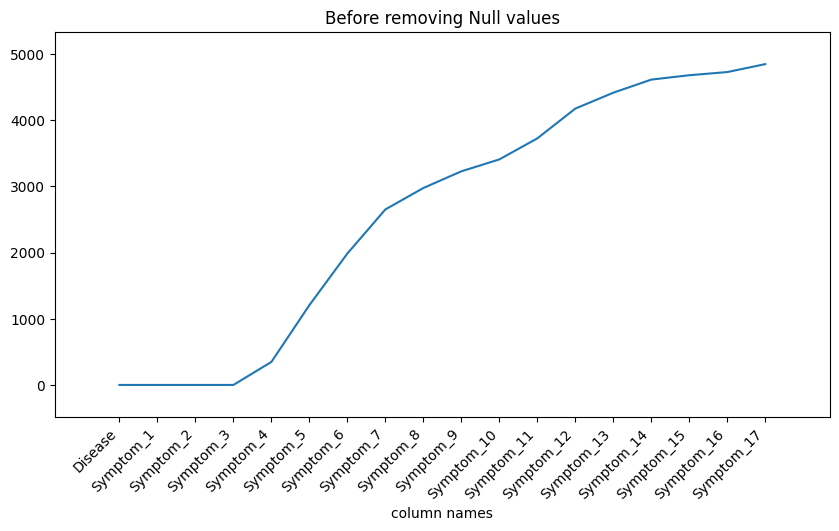

In [56]:
plt.figure(figsize=(10,5))
plt.plot(check_null.index, check_null['count'])
plt.xticks(check_null.index, check_null.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [57]:
# check ade null or tak for Symptom-severity.csv
check_null = severity.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(check_null)


         count
Symptom      0
weight       0


In [58]:
# Remove the trailing space from the symptom columns
cols = dataset.columns
data = dataset[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(dataset.shape)

dataset = pd.DataFrame(s, columns=dataset.columns)
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
severity.head()

,Symptom,weight
0,itching,1
1,altered_sensorium,2
2,blackheads,2
3,hip_joint_pain,2
4,inflammatory_nails,2


In [60]:
# NaN tukar zero
dataset = dataset.fillna(0)
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin_rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,0,0,0,0,0,0
3,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,0,0,0,0,0,0,0,0,0


In [61]:
# Create a new DataFrame with the same structure as dataset
data_severity = pd.DataFrame(columns=dataset.columns)

# data_severity keep the same columns as dataset.csv, including diseases, symptoms, and severity
data_severity['Disease'] = dataset['Disease']
data_severity.iloc[:, 1:18] = dataset.iloc[:, 1:18]  

# NaN tukar zero
data_severity = data_severity.fillna(0)

# Display the new DataFrame
data_severity.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin_rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,0,0,0,0,0,0
3,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,0,0,0,0,0,0,0,0,0


In [62]:
# Add a numeric ID to each symptom
symptom_id_dict = {symptom: index + 1 for index, symptom in enumerate(severity['Symptom'])}
severity['Symptom_ID'] = severity['Symptom'].map(symptom_id_dict, na_action='ignore')

# Calculate severity as Symptom_ID * weight
#severity['severity'] = severity['Symptom_ID']

# Create a dictionary for mapping symptoms to symptom_id
symptom_id_dict = dict(zip(severity['Symptom'], severity['Symptom_ID']))

# Encode symptoms in the data with the symptom id
for column in dataset.columns[1:]:
    dataset[column] = dataset[column].str.strip().map(symptom_id_dict)

# Create a dictionary for mapping symptoms to weight
symptom_severity_dict = dict(zip(severity['Symptom'], severity['weight']))

# Encode symptoms in the data with the symptom severity
for column in data_severity.columns[1:]:
    data_severity[column] = data_severity[column].str.strip().map(symptom_severity_dict)
    
# NaN tukar zero
data_severity = data_severity.fillna(0)

# Sum up severity values for each row
data_severity['totalseverity'] = data_severity.iloc[:, 1:].sum(axis=1)

dataset['severity'] = data_severity['totalseverity']

# NaN tukar zero
dataset = dataset.fillna(0)

dataset.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,severity
0,Acne,30,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Acne,30,11.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2,Hyperthyroidism,55,26.0,35.0,102.0,32.0,116.0,85.0,54.0,9.0,6.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
3,AIDS,27,123.0,131.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
4,Chronic cholestasis,1,111.0,37.0,93.0,58.0,38.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
5,Hypertension,21,129.0,52.0,59.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
6,Hypoglycemia,111,55.0,39.0,32.0,21.0,93.0,79.0,54.0,53.0,68.0,6.0,64.0,0.0,0.0,0.0,0.0,0.0,47.0
7,Arthritis,9,69.0,106.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
8,Hepatitis B,1,55.0,7.0,37.0,49.0,58.0,38.0,75.0,76.0,121.0,100.0,12.0,0.0,0.0,0.0,0.0,0.0,43.0
9,Migraine,17,89.0,21.0,79.0,54.0,69.0,20.0,6.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0


In [63]:
# Assign symptoms with no rank to zero
dataset = dataset.replace('dischromic  patches',0)
dataset = dataset.replace('spotting  urination',0)
dataset = dataset.replace('foul smell of urine',0)


In [27]:

check_null = dataset.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(check_null)


            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0
severity        0


In [64]:
# NaN tukar zero
dataset = dataset.fillna(0)
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,severity
0,Acne,30,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Acne,30,11.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2,Hyperthyroidism,55,26.0,35.0,102.0,32.0,116.0,85.0,54.0,9.0,6.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
3,AIDS,27,123.0,131.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
4,Chronic cholestasis,1,111.0,37.0,93.0,58.0,38.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0


In [65]:
print("Number of symptoms used to identify the disease ",len(severity['Symptom'].unique()))
print("Number of diseases that can be identified ",len(dataset['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [66]:
# retrive nama diseases from data
dataset['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

In [67]:
# Select the features as symptoms column and label as Disease column
data = dataset.iloc[:,1:19].astype(int)
labels = dataset['Disease'].values
data.head(10)

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,severity
0,30,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
1,30,11,3,14,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,55,26,35,102,32,116,85,54,9,6,112,0,0,0,0,0,0,43
3,27,123,131,83,0,0,0,0,0,0,0,0,0,0,0,0,0,21
4,1,111,37,93,58,38,76,0,0,0,0,0,0,0,0,0,0,26
5,21,129,52,59,24,0,0,0,0,0,0,0,0,0,0,0,0,21
6,111,55,39,32,21,93,79,54,53,68,6,64,0,0,0,0,0,47
7,9,69,106,10,0,0,0,0,0,0,0,0,0,0,0,0,0,13
8,1,55,7,37,49,58,38,75,76,121,100,12,0,0,0,0,0,43
9,17,89,21,79,54,69,20,6,33,0,0,0,0,0,0,0,0,32


In [68]:
# Splitting the dataset to training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 18) (984, 18) (3936,) (984,)


In [69]:
#define randomforest model
modelRFC = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
modelRFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [70]:
y_pred = modelRFC.predict(x_test)
print(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
373          17         89         21         79         54         69   
4916        111         89         58         38         57          0   
1550          1         30          0          0          0          0   
3081        111         55         39         32         93         79   
3857          1         55          7         37         49         58   
...         ...        ...        ...        ...        ...        ...   
1101          9        106         92         10          0          0   
4639         55         34         81         26          7         52   
3625          1        105        114          0          0          0   
378           1        111         35        131         37         49   
495         111         37         38        132         51         87   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
373          20          6        

In [71]:
# Define the set of symptoms for prediction
symptoms_to_predict = ["fatigue", "weight_loss", "restlessness", "lethargy", "irregular_sugar_level", "blurred_and_distorted_vision", "obesity", "excessive_hunger", "increased_appetite", "polyuria"]

# Create a DataFrame for the input symptoms with NaN for additional symptoms
input_data = pd.DataFrame([[None] + symptoms_to_predict + [np.nan] * (17 - len(symptoms_to_predict))], columns=dataset.columns[:-1])

In [72]:
input_data.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,None,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Replace spaces with underscores in symptom names 
input_data.columns = input_data.columns.str.replace(' ', '_')

# Remove the trailing space from the symptom columns
cols = input_data.columns
data = input_data[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(input_data.shape)


In [74]:
input_data = pd.DataFrame(s, columns=input_data.columns)
input_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,None,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Create a new DataFrame with the same structure as inputdataset
input_data_severity = pd.DataFrame(columns=input_data.columns)

# input_data_severity keep the same columns as input_data, including diseases, symptoms, and severity
input_data_severity['Disease'] = input_data['Disease']
input_data_severity.iloc[:, 1:17] = input_data.iloc[:, 1:17]  

# Display the new DataFrame
input_data_severity.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,None,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Encode symptoms in the data with the symptom id
for column in input_data.columns[1:]:
    input_data[column] = input_data[column].str.strip().map(symptom_id_dict)

input_data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,None,55,35,102,7,90,79,62,54,88,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
input_data_severity.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,None,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,excessive_hunger,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Encode symptoms in the data with the symptom severity
for column in input_data_severity.columns[1:]:
    input_data_severity[column] = input_data_severity[column].str.strip().map(symptom_severity_dict)
    
# NaN tukar zero
input_data_severity = input_data_severity.fillna(0)

# Sum up severity values for each row
input_data_severity['totalseverity'] = input_data_severity.iloc[:, 1:].sum(axis=1)

input_data['severity'] = input_data_severity['totalseverity']

# NaN tukar zero
input_data = input_data.fillna(0)

input_data.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,severity
0,0,55,35,102,7,90,79,62,54,88,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0


In [79]:
input_data_severity.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,totalseverity
0,0,4,3,5,2,5,5,4,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0


In [80]:
# Convert the input data to NumPy array
input_data_array = input_data.iloc[:, 1:].values

# Make predictions using the trained model
predicted_probabilities = modelRFC.predict_proba(input_data_array)[0]


c:\Users\afham\OneDrive\Desktop\Degree\4\fyp\coding - finalize backup\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
# Get the top 5 predicted diseases
top5_indices = predicted_probabilities.argsort()[-5:][::-1]
top5_diseases = modelRFC.classes_[top5_indices]

# Display the top 5 predicted diseases
print("Top 5 Predicted Diseases:")
for i, disease in enumerate(top5_diseases, 1):
    print(f"{i}. {disease}")

# Display the accuracy on the test set (assuming 'y_test' and 'x_test' are already defined)
test_predictions = modelRFC.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("\nAccuracy on the Test Set:", accuracy)

# Display the top 5 predicted diseases with confidence levels and severity
print("\nTop 5 Predicted Diseases with Confidence Levels and Severity:")
for i, (disease, probability) in enumerate(zip(top5_diseases, predicted_probabilities[top5_indices]), 1):
    severity_value = dataset[dataset['Disease'] == disease]['severity'].values[0]
    #severity_percentage = (severity_value / dataset['severity'].sum()) * 100
    print(f"{i}. {disease}: Confidence Level: {probability:.2%}, Severity: {severity_value:.2f}%")


Top 5 Predicted Diseases:
1. Diabetes
2. Hyperthyroidism
3. Hypoglycemia
4. hepatitis A
5. Hepatitis D

Accuracy on the Test Set: 0.9979674796747967

Top 5 Predicted Diseases with Confidence Levels and Severity:
1. Diabetes: Confidence Level: 94.36%, Severity: 41.00%
2. Hyperthyroidism: Confidence Level: 1.69%, Severity: 43.00%
3. Hypoglycemia: Confidence Level: 1.01%, Severity: 47.00%
4. hepatitis A: Confidence Level: 0.93%, Severity: 41.00%
5. Hepatitis D: Confidence Level: 0.61%, Severity: 36.00%


In [82]:
# Get the top 5 predicted diseases
top5_indices = predicted_probabilities.argsort()[-5:][::-1]
top5_diseases = modelRFC.classes_[top5_indices]

# Display the top 5 predicted diseases
print("Top 5 Predicted Diseases:")
for i, disease in enumerate(top5_diseases, 1):
    print(f"{i}. {disease}")

# Display the accuracy on the test set (assuming 'y_test' and 'x_test' are already defined)
test_predictions = modelRFC.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("\nAccuracy on the Test Set:", accuracy)

# Display the top 5 predicted diseases with confidence levels and severity
print("\nTop 5 Predicted Diseases with Confidence Levels and Severity:")
for i, (disease, probability) in enumerate(zip(top5_diseases, predicted_probabilities[top5_indices]), 1):
    severity_value = dataset[dataset['Disease'] == disease]['severity'].values[0]
    #severity_percentage = (severity_value / dataset['severity'].sum()) * 100
    print(f"{i}. {disease}: Confidence Level: {probability:.2%}, Severity: {severity_value:.2f}%")

Top 5 Predicted Diseases:
1. Diabetes
2. Hyperthyroidism
3. Hypoglycemia
4. hepatitis A
5. Hepatitis D

Accuracy on the Test Set: 0.9979674796747967

Top 5 Predicted Diseases with Confidence Levels and Severity:
1. Diabetes: Confidence Level: 94.36%, Severity: 41.00%
2. Hyperthyroidism: Confidence Level: 1.69%, Severity: 43.00%
3. Hypoglycemia: Confidence Level: 1.01%, Severity: 47.00%
4. hepatitis A: Confidence Level: 0.93%, Severity: 41.00%
5. Hepatitis D: Confidence Level: 0.61%, Severity: 36.00%


In [83]:
import joblib

In [84]:
joblib.dump({
    'modelRFC': modelRFC,
    'x_test': x_test,
    'y_test': y_test,
    'symptom_severity_dict': symptom_severity_dict,
    'dataset': dataset,
    'symptom_id_dict':symptom_id_dict
}, 'model_and_data.joblib')

['model_and_data.joblib']